In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json



with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [2]:
album_urls = []
album_ids = []
album_genres = []
blank = 0
for i in range(0,50,50):
    album_results = spotify.search(q='year:2021', type='album', limit=50,offset=i)
    for i, img in enumerate(album_results["albums"]["items"]):
        id = img["id"]
        url = img["images"][1]["url"]
        album_urls.append(url)
        album_ids.append(id)
        album = spotify.album(id)
        genres = album["genres"]
        if genres == []:
           blank +=1
        else: 
            album_genres.append(genres)


In [3]:
print(album_genres)
print(blank)

[]
50


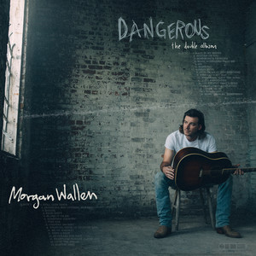

In [4]:
from fastdownload import download_url
dest = "album1.jpg"

download_url(album_urls[0], dest=dest)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)